#   导包

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

##### 设置工作目录

In [2]:
os.chdir("D:\\ANN\\ANN\\")

#  探索性数据分析

In [3]:
data = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

In [4]:
data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [5]:
#数据类型
data.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [6]:
#数唯一值
data.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

# 缺失值分析

In [7]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### 每一个变量都是740个，没有缺失值

# 将变量分为分类变量和连续变量

In [8]:
category_column_names = ['customer name','customer e-mail','country','gender']

In [9]:
for i in category_column_names :
    data[i] = data[i].astype('category')
    
continous_column_names = []

for i in data.columns:
    if i not in category_column_names:
        data[i] = data[i].astype('float')
        continous_column_names.append(i)

In [10]:
category_column_names

['customer name', 'customer e-mail', 'country', 'gender']

In [11]:
continous_column_names

['age',
 'annual Salary',
 'credit card debt',
 'net worth',
 'car purchase amount']

In [12]:
data.dtypes

customer name          category
customer e-mail        category
country                category
gender                 category
age                     float64
annual Salary           float64
credit card debt        float64
net worth               float64
car purchase amount     float64
dtype: object

# 连续变量分析

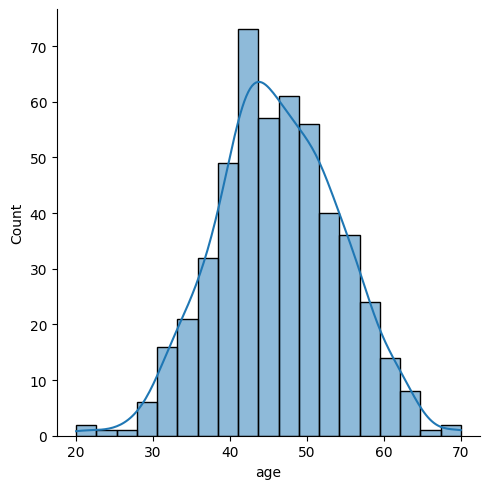

In [13]:
sns.displot(data['age'],kde = True)

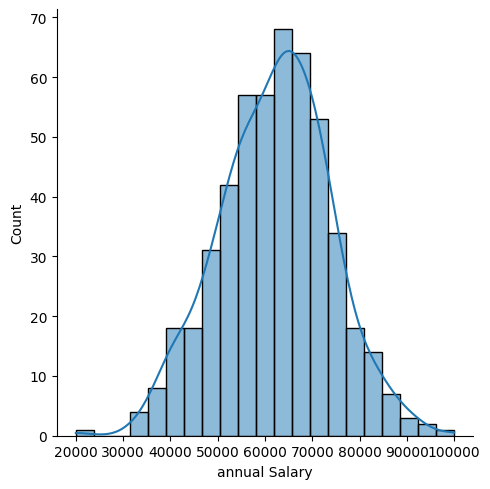

In [14]:
sns.displot(data['annual Salary'],kde = True)

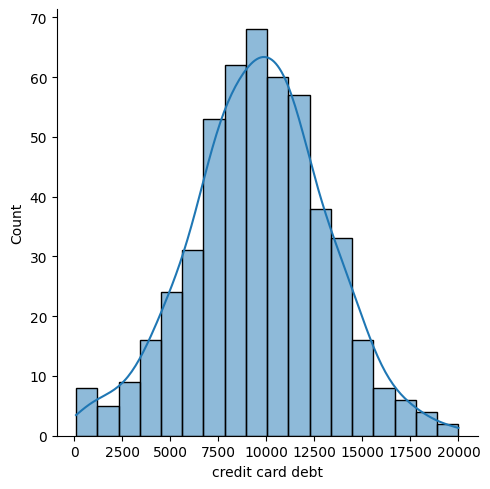

In [15]:
sns.displot(data[ 'credit card debt'],kde = True)

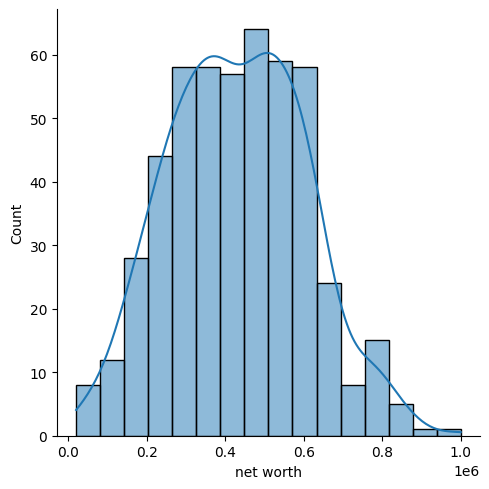

In [16]:
sns.displot(data['net worth'],kde = True)

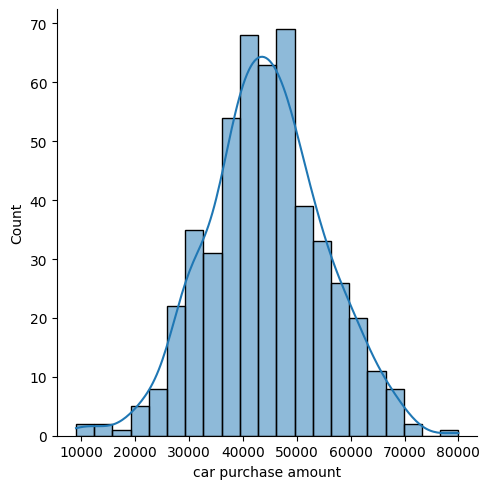

In [17]:
sns.displot(data['car purchase amount'],kde = True)

# 离群点分析

### 画箱线图

In [18]:
continous_column_names

['age',
 'annual Salary',
 'credit card debt',
 'net worth',
 'car purchase amount']

<Axes: >

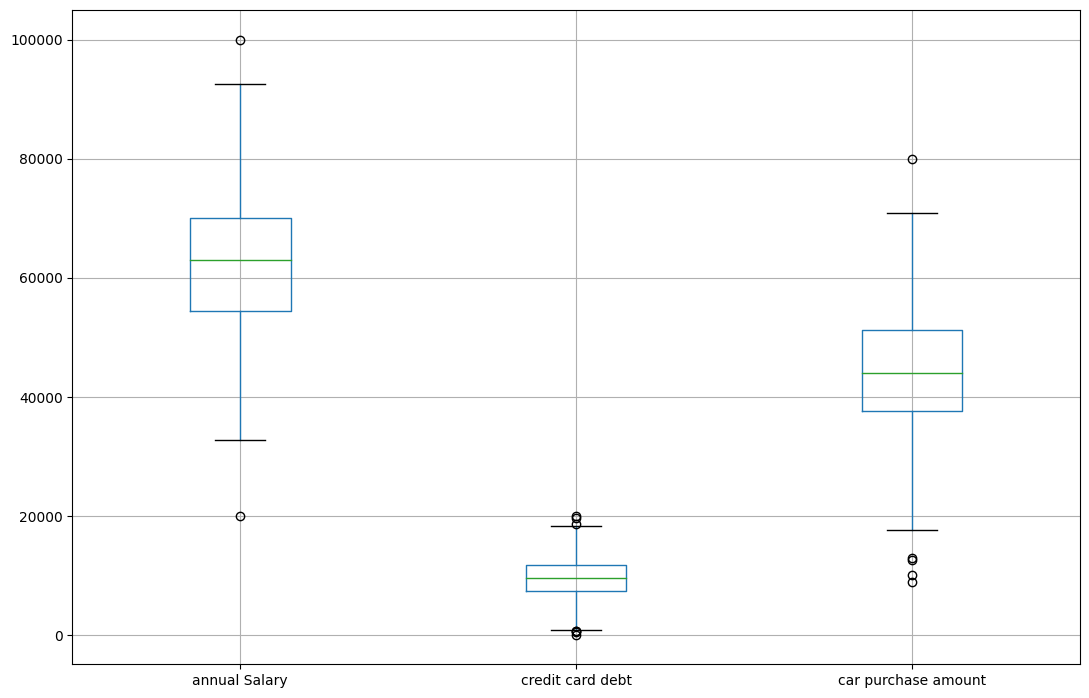

In [19]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 8.5
plt.rcParams["figure.figsize"] = fig_size
data.boxplot(column=[
 'annual Salary',
 'credit card debt',
 'car purchase amount'])

<Axes: >

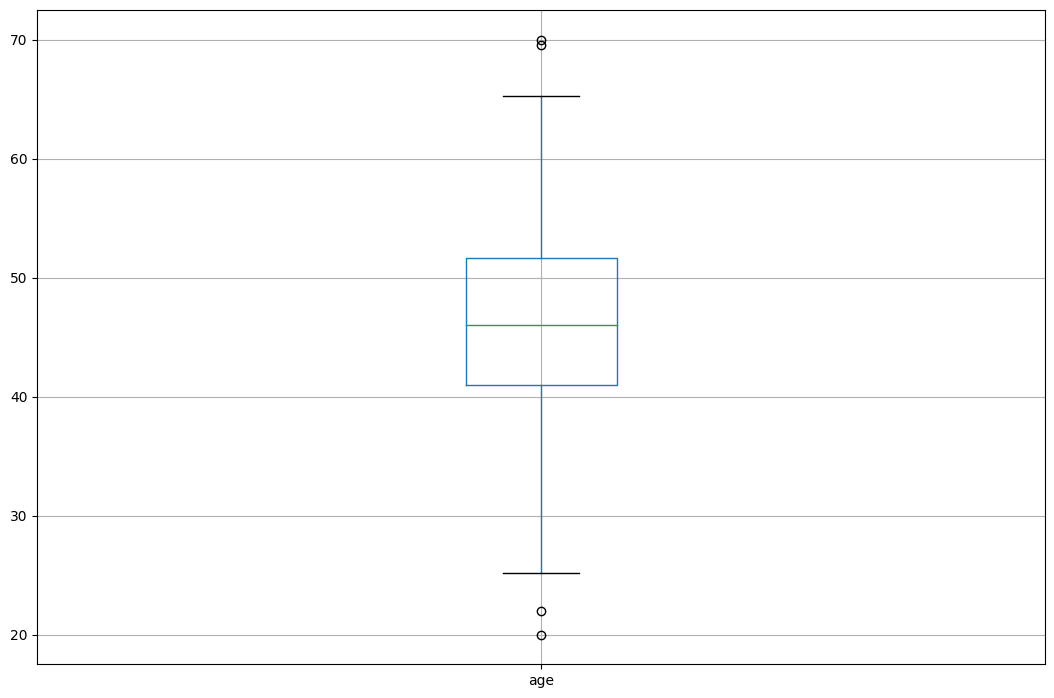

In [20]:
data.boxplot(column = ['age'])

<Axes: >

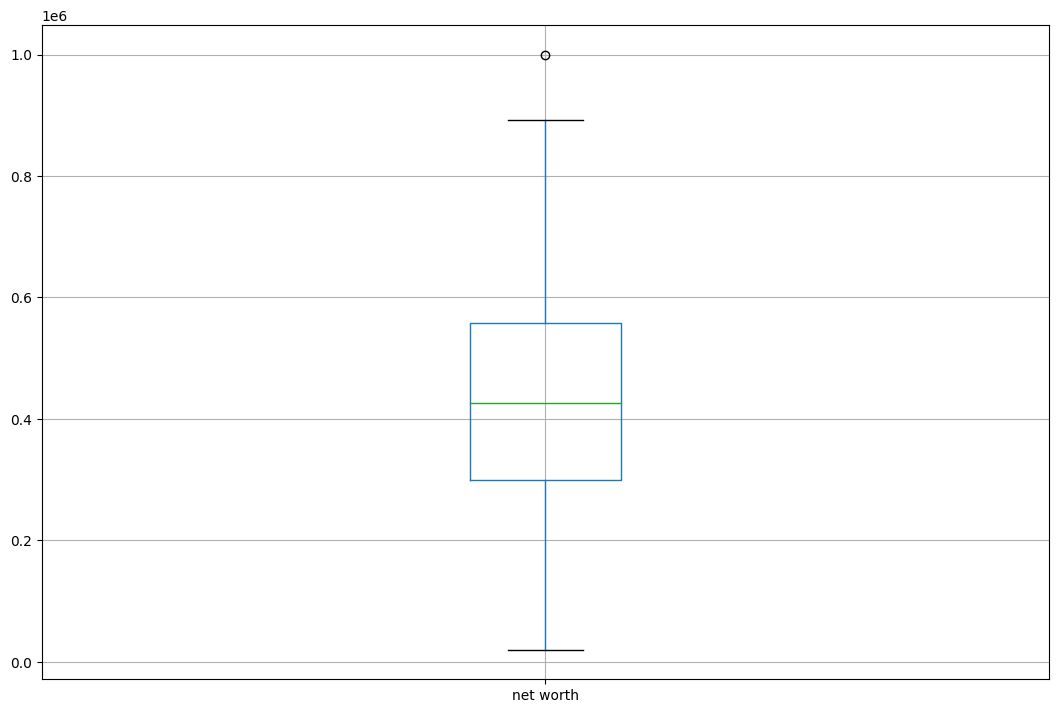

In [21]:
data.boxplot(column = ["net worth"])

##### 上面画了连续变量的箱线图，发现有几个有·离群点，也就是下面这几个，可以自己对一下，然后划一个范围，比这个范围小的替成范围的左区间，大的右区间，再画图就没有离群点了

In [22]:
for i in ['age',
 'annual Salary',
 'credit card debt',
 'net worth',
 'car purchase amount']:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    data.loc[data[i] < min,i] = min
    data.loc[data[i] > max,i] = max

<Axes: >

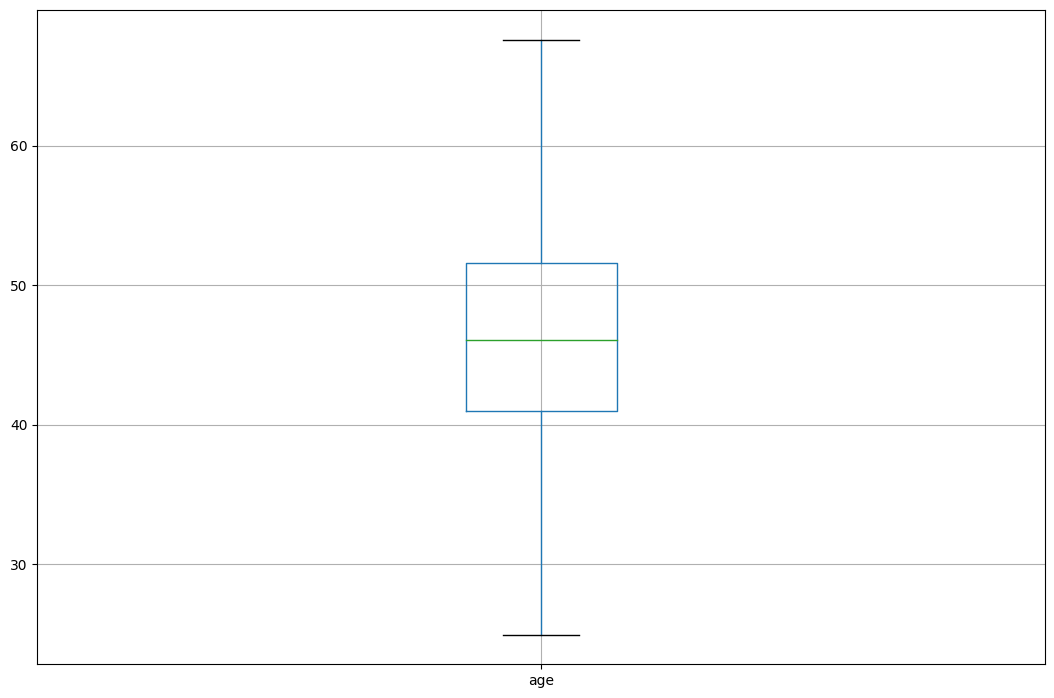

In [23]:
data.boxplot(column=['age'])

<Axes: >

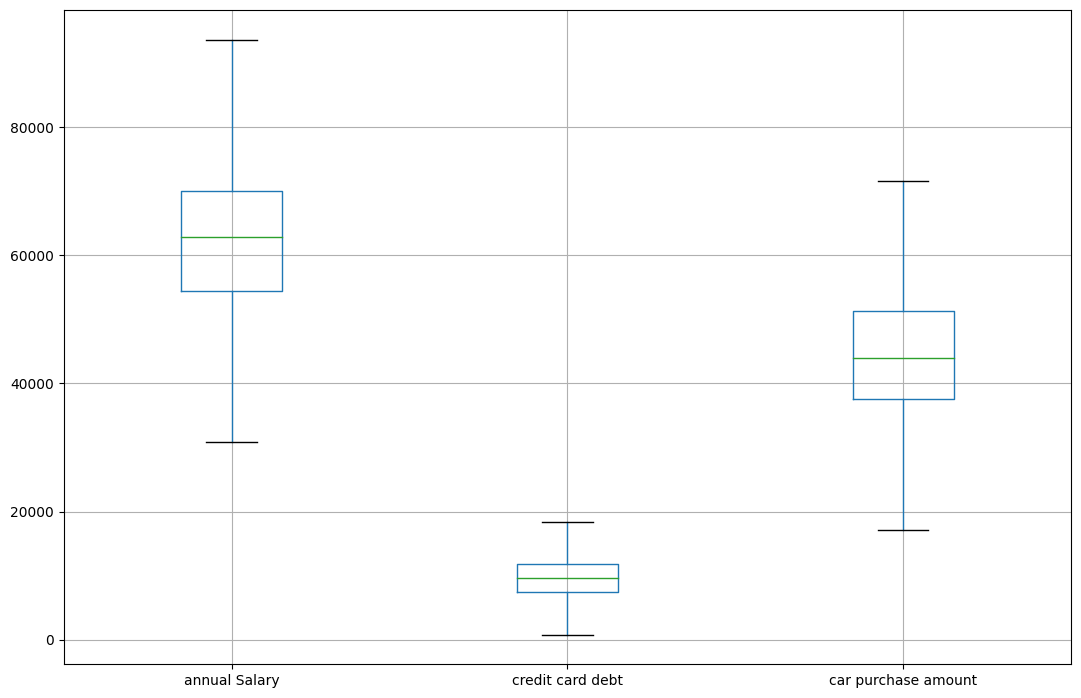

In [24]:
data.boxplot(column=[
 'annual Salary',
 'credit card debt',
 'car purchase amount'])

<Axes: >

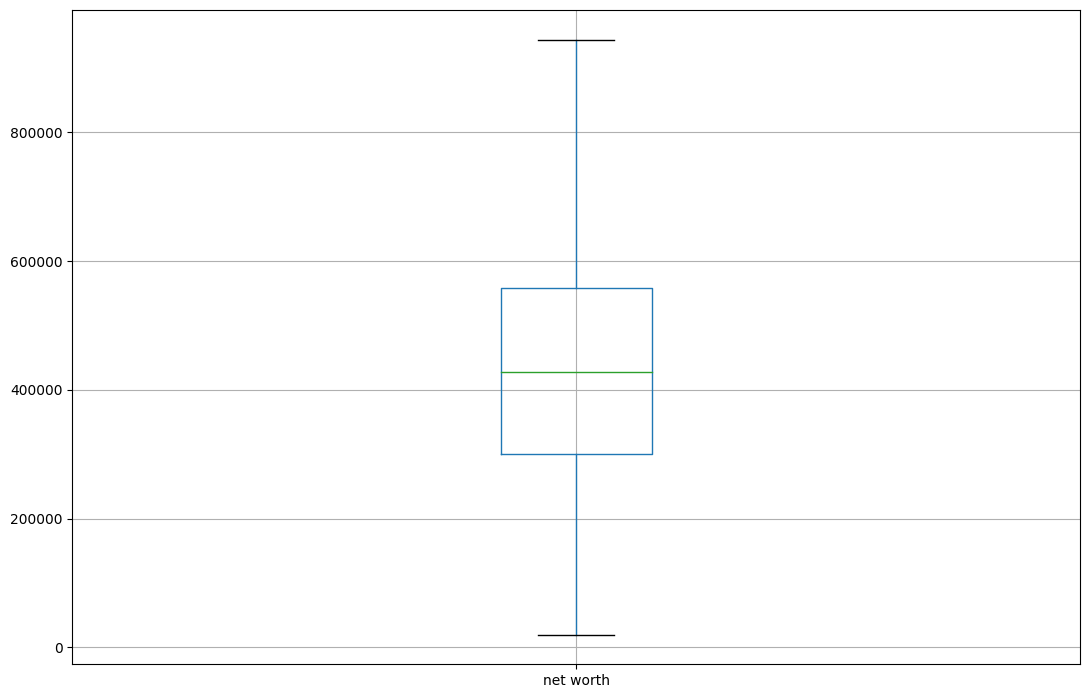

In [25]:
data.boxplot(column=["net worth"])

# 相关性分析

分类变量

In [26]:
data.dtypes

customer name          category
customer e-mail        category
country                category
gender                 category
age                     float64
annual Salary           float64
credit card debt        float64
net worth               float64
car purchase amount     float64
dtype: object

In [27]:
from scipy.stats import chi2_contingency

In [28]:
factors_paired = [(i,j) for i in category_column_names for j in category_column_names] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(data[f[0]], data[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((4,4))
p1 = pd.DataFrame(p1, index=category_column_names, columns=category_column_names)
p1

,customer name,customer e-mail,country,gender
customer name,0.000000,0.240043,0.319865,0.504231
customer e-mail,0.240043,0.000000,0.322806,0.478972
country,0.319865,0.322806,0.000000,0.348043
gender,0.504231,0.478972,0.348043,0.000000


连续变量

In [29]:
data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [30]:
data.loc[:,continous_column_names].corr()

,age,annual Salary,credit card debt,net worth,car purchase amount
age,1.000000,-0.002114,0.032823,0.020675,0.632618
annual Salary,-0.002114,1.000000,0.050400,0.016860,0.615808
credit card debt,0.032823,0.050400,1.000000,-0.049672,0.032022
net worth,0.020675,0.016860,-0.049672,1.000000,0.487688
car purchase amount,0.632618,0.615808,0.032022,0.487688,1.000000


In [31]:
data_encoded = pd.get_dummies(data=data, columns=category_column_names)

In [32]:
data_encoded

,age,annual Salary,credit card debt,net worth,car purchase amount,customer name_Abel Stanton,customer name_Abigail X. Lindsey,customer name_Abra D. Golden,customer name_Adria Mathis,customer name_Adrian Brock,...,"country_Virgin Islands, British","country_Virgin Islands, United States",country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zimbabwe,country_marlal,country_Åland Islands,gender_0,gender_1
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [33]:
column_to_move = 'car purchase amount'
df = data_encoded[[col for col in data_encoded.columns if col != column_to_move] + [column_to_move]]

In [34]:
df

,age,annual Salary,credit card debt,net worth,customer name_Abel Stanton,customer name_Abigail X. Lindsey,customer name_Abra D. Golden,customer name_Adria Mathis,customer name_Adrian Brock,customer name_Adrienne,...,"country_Virgin Islands, United States",country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zimbabwe,country_marlal,country_Åland Islands,gender_0,gender_1,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,55915.46248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,45442.15353


In [35]:
from sklearn.decomposition import PCA


# 提取特征数据和目标变量
features = df.columns[:-1]
X = df[features].values
y = df.iloc[:, -1].values

# 执行PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# 获取解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_

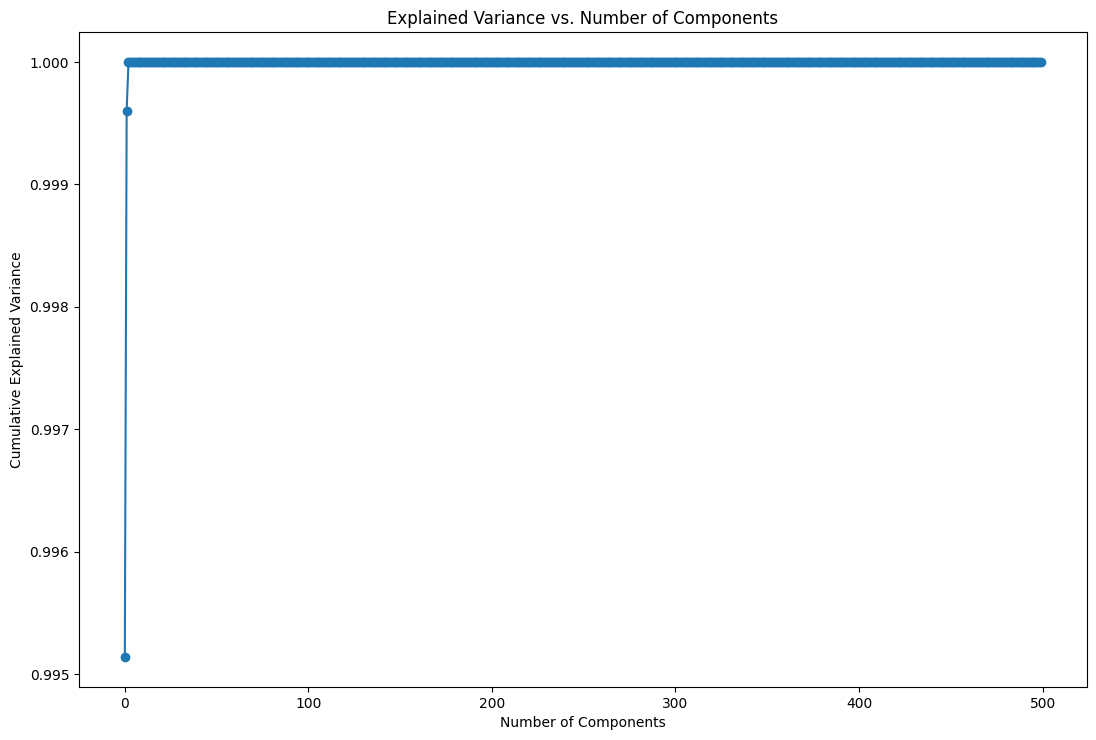

In [36]:
plt.plot(explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


In [37]:
num_components = 7
X_pca_selected = X_pca[:, :num_components]
pca_data = pd.DataFrame(X_pca_selected, columns=[f"PC{i+1}" for i in range(num_components)])
pca_data['car purchase amount'] = y 

In [38]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,car purchase amount
0,-192402.621894,924.391255,1799.088987,-4.349626,0.756101,-0.000038,0.011429,35321.45877
1,99616.076877,4398.194712,-5.624972,-5.461298,0.738685,0.002848,0.001991,45115.52566
2,207093.075305,-8541.733507,1906.383119,-3.457661,-0.667504,-0.007290,-0.061064,42925.70921
3,117250.804519,17181.410622,4650.935121,11.572414,-0.788146,0.000699,-0.027873,67422.36313
4,128942.548001,-2622.159521,-4073.297881,11.252405,-0.781313,0.004013,-0.010939,55915.46248
...,...,...,...,...,...,...,...,...
495,110320.826136,9637.692395,-2660.470615,-4.664222,0.700051,0.002207,-0.006866,48901.44342
496,-70953.280229,-5971.300295,2727.944334,-8.765585,-0.619467,-0.005124,0.004388,31491.41457
497,333174.733432,6396.295271,1231.842743,7.290224,-0.761967,0.003341,-0.028338,64147.28888
498,-93554.479130,-12143.918748,4521.046879,12.625091,-0.725896,-0.000958,-0.005739,45442.15353


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MLP

In [40]:
X = pca_data.drop('car purchase amount', axis=1)
y = pca_data['car purchase amount']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
X_train_scaled.shape

(400, 7)

In [42]:
X_test_scaled.shape

(100, 7)

In [43]:
model = MLPRegressor(hidden_layer_sizes=(100,50,), max_iter=8500, random_state=42)
model.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
# 评估模型性能
print(f'R-squared: {r2}')

Mean Absolute Error: 257.00791360011357
Mean Squared Error: 288585.0243077696
R-squared: 0.9973272522022585


# 线性回归

In [44]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,car purchase amount
0,-192402.621894,924.391255,1799.088987,-4.349626,0.756101,-0.000038,0.011429,35321.45877
1,99616.076877,4398.194712,-5.624972,-5.461298,0.738685,0.002848,0.001991,45115.52566
2,207093.075305,-8541.733507,1906.383119,-3.457661,-0.667504,-0.007290,-0.061064,42925.70921
3,117250.804519,17181.410622,4650.935121,11.572414,-0.788146,0.000699,-0.027873,67422.36313
4,128942.548001,-2622.159521,-4073.297881,11.252405,-0.781313,0.004013,-0.010939,55915.46248
...,...,...,...,...,...,...,...,...
495,110320.826136,9637.692395,-2660.470615,-4.664222,0.700051,0.002207,-0.006866,48901.44342
496,-70953.280229,-5971.300295,2727.944334,-8.765585,-0.619467,-0.005124,0.004388,31491.41457
497,333174.733432,6396.295271,1231.842743,7.290224,-0.761967,0.003341,-0.028338,64147.28888
498,-93554.479130,-12143.918748,4521.046879,12.625091,-0.725896,-0.000958,-0.005739,45442.15353


In [45]:
X = pca_data.drop('car purchase amount', axis=1)
y = pca_data['car purchase amount']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# 初始化线性回归模型
model = LinearRegression()

# 拟合模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 168.14365231973235
Mean Squared Error: 72891.77568353897
R-squared: 0.9993249083752735


# 决定树

In [46]:
pca_data


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,car purchase amount
0,-192402.621894,924.391255,1799.088987,-4.349626,0.756101,-0.000038,0.011429,35321.45877
1,99616.076877,4398.194712,-5.624972,-5.461298,0.738685,0.002848,0.001991,45115.52566
2,207093.075305,-8541.733507,1906.383119,-3.457661,-0.667504,-0.007290,-0.061064,42925.70921
3,117250.804519,17181.410622,4650.935121,11.572414,-0.788146,0.000699,-0.027873,67422.36313
4,128942.548001,-2622.159521,-4073.297881,11.252405,-0.781313,0.004013,-0.010939,55915.46248
...,...,...,...,...,...,...,...,...
495,110320.826136,9637.692395,-2660.470615,-4.664222,0.700051,0.002207,-0.006866,48901.44342
496,-70953.280229,-5971.300295,2727.944334,-8.765585,-0.619467,-0.005124,0.004388,31491.41457
497,333174.733432,6396.295271,1231.842743,7.290224,-0.761967,0.003341,-0.028338,64147.28888
498,-93554.479130,-12143.918748,4521.046879,12.625091,-0.725896,-0.000958,-0.005739,45442.15353


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


X = pca_data.drop('car purchase amount', axis=1)
y = pca_data['car purchase amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 3699.0450431
Mean Squared Error: 21459623.98398445
R-squared: 0.8012503840726446


In [48]:
X = df.drop('car purchase amount', axis=1)
y = pca_data['car purchase amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 2960.5702331499992
Mean Squared Error: 13296829.078350026
R-squared: 0.8768506067792211


# 随机森林

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 假设数据存储在名为 'data' 的DataFrame中
# 特征（X）和目标变量（y）的选择
X = pca_data.drop('car purchase amount', axis=1)
y = pca_data['car purchase amount']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 2009.4031057404366
Mean Squared Error: 6966180.6743667135
R-squared: 0.9354822929542365


In [50]:
X = df.drop('car purchase amount', axis=1)
y = pca_data['car purchase amount']
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf_model.predict(X_test)

# 评估模型性能
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1687.680012449623
Mean Squared Error: 5798926.514606664
R-squared: 0.9462928885226889


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
import tensorflow as tf

In [52]:
X = pca_data.drop('car purchase amount', axis=1)
y = pca_data['car purchase amount']
sc = StandardScaler()

X = sc.fit_transform(X)
y = sc.fit_transform(y.values.reshape(-1,1))

In [53]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 7)
(125, 7)
(375, 1)
(125, 1)


In [54]:
classifier = Sequential()


classifier.add(Dense(5 , activation = "ReLU"))
classifier.add(Dense(units = 4 , activation = "ReLU"))
classifier.add(Dense(units = 2 , activation = "ReLU"))

classifier.add(Dense(1 , activation = "linear"))
classifier.compile(optimizer = "adam" , loss = "mean_squared_error" , 
                   metrics = ["mean_absolute_error"])

In [55]:
early = tf.keras.callbacks.EarlyStopping(
    monitor = "val_mean_absolute_error",
    min_delta = 0.001,
    patience = 10,
    verbose = True,
    mode = "auto",
    restore_best_weights = True)

In [ ]:
model = classifier.fit(X_train , y_train , validation_split = 0.25 , 
                       batch_size = 10 , epochs = 400 , callbacks = early)

Epoch 1/400
29/29 [==============================] - 1s 9ms/step - loss: 0.9241 - mean_absolute_error: 0.7435 - val_loss: 1.0045 - val_mean_absolute_error: 0.8278
Epoch 2/400
29/29 [==============================] - 0s 4ms/step - loss: 0.8926 - mean_absolute_error: 0.7320 - val_loss: 0.9711 - val_mean_absolute_error: 0.8143
Epoch 3/400
29/29 [==============================] - 0s 4ms/step - loss: 0.8556 - mean_absolute_error: 0.7178 - val_loss: 0.9222 - val_mean_absolute_error: 0.7903
Epoch 4/400
29/29 [==============================] - 0s 4ms/step - loss: 0.8080 - mean_absolute_error: 0.6977 - val_loss: 0.8658 - val_mean_absolute_error: 0.7622
Epoch 5/400
29/29 [==============================] - 0s 4ms/step - loss: 0.7442 - mean_absolute_error: 0.6673 - val_loss: 0.7900 - val_mean_absolute_error: 0.7230
Epoch 6/400
29/29 [==============================] - 0s 4ms/step - loss: 0.6683 - mean_absolute_error: 0.6268 - val_loss: 0.7148 - val_mean_absolute_error: 0.6840
Epoch 7/400
29/29 [===

In [ ]:
classifier.summary()

In [ ]:
model.history.keys()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )